In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [329]:
# Se cargan los datos automaticamente 

ruta_actual = os.getcwd()
ruta_completa = ruta_actual + '\data_to_transform\df.csv'
ruta_exportar = ruta_actual + '\data_to_transform\'

df = pd.read_csv(ruta_completa)
df

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:37:36.4490-0500,Murillo
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:39:34.0869-0500,Murillo
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:41:38.1739-0500,Murillo
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:53:33.8200-0500,Murillo
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31T08:55:20.5970-0500,Murillo
...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T18:53:10.4680-0400,Rio de Janeiro
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T19:26:46.7760-0400,Rio de Janeiro
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T20:13:59.2720-0400,Rio de Janeiro
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28T20:14:36.1140-0400,Rio de Janeiro


**Diccionario de variables:**

- Duration: Describe la duración en segundos de la interacción que tuvo el usuario con la olla. Pudo ser debido a un movimiento o a la interacción con el panel de un solo botón.
- MovementDuration: Indica la duración en segundos del movimiento que registró la olla
- MovementInteractions: Indica la cantidad de veces que movieron la olla
- HardwareInteractions: Indica la cantidad de veces que el usuario interactuó con el extraordinario panel de un solo botón
- Key: Es un código interno que permite identificar la olla. Corresponde al campo IDENTIFICADOR_OLLA
- Date: Fecha en formato ISO8601
- Name: Nombre de la ciudad donde se produjo la interacción


In [330]:
# Se identifica el formato para cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96032 entries, 0 to 96031
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Duration              96032 non-null  int64 
 1   MovementDuration      96032 non-null  int64 
 2   MovementInteractions  96032 non-null  int64 
 3   HardwareInteractions  96032 non-null  int64 
 4   Key                   96032 non-null  object
 5   Date                  96032 non-null  object
 6   Name                  96032 non-null  object
dtypes: int64(4), object(3)
memory usage: 5.1+ MB


**Es necesario convertir la variable Date a DateTime para realizar la generación de variables de tiempo**

----------------------------------------

In [331]:
#Conversión del tipo de dato 
df['Date'] = pd.to_datetime(df['Date'], utc= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96032 entries, 0 to 96031
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Duration              96032 non-null  int64              
 1   MovementDuration      96032 non-null  int64              
 2   MovementInteractions  96032 non-null  int64              
 3   HardwareInteractions  96032 non-null  int64              
 4   Key                   96032 non-null  object             
 5   Date                  96032 non-null  datetime64[ns, UTC]
 6   Name                  96032 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 5.1+ MB


**Variables con el formato a trabajar**

--------------------------------------

In [332]:
# Se comprueba si existe varlores faltantes
df.isna().sum().sort_values()

Duration                0
MovementDuration        0
MovementInteractions    0
HardwareInteractions    0
Key                     0
Date                    0
Name                    0
dtype: int64

**No existen valores faltantes**


--------------------------

In [333]:
# Se describen las variables cuantitativas
df.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions
count,96032.000000,96032.000000,96032.000000,96032.0
mean,198.850362,142.098353,1.342990,0.0
std,3982.561445,3654.373332,12.820468,0.0
min,0.000000,0.000000,0.000000,0.0
25%,9.000000,0.000000,0.000000,0.0
50%,15.000000,0.000000,0.000000,0.0
75%,21.000000,5.000000,1.000000,0.0
max,446732.000000,446716.000000,1620.000000,0.0


**Existe un error en la toma de datos para la variable de HardwareInteractions, debido a que presenta todos sus datos en 0.**

**Existen valores atipicos en Duration, MovementDuration y MovementInteractions, es decir, estas ollas pueden estar presentando error en la lectura de datos.**

# Nuevas variables

In [334]:
# Se crean neuvas variables a partir de la variable Date
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['time'] = df['Date'].dt.strftime("%H:%M:%S")
df['hour'] = df['Date'].dt.hour
df['minute'] = df['Date'].dt.minute
df['hour_minute'] = df['Date'].dt.strftime("%H:%M")
df['date'] = df['Date'].dt.date
df

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36,13,37,13:37,2020-07-31
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34,13,39,13:39,2020-07-31
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38,13,41,13:41,2020-07-31
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33,13,53,13:53,2020-07-31
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20,13,55,13:55,2020-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 22:53:10.468000+00:00,Rio de Janeiro,Monday,September,22:53:10,22,53,22:53,2020-09-28
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 23:26:46.776000+00:00,Rio de Janeiro,Monday,September,23:26:46,23,26,23:26,2020-09-28
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:13:59.272000+00:00,Rio de Janeiro,Tuesday,September,00:13:59,0,13,00:13,2020-09-29
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:14:36.114000+00:00,Rio de Janeiro,Tuesday,September,00:14:36,0,14,00:14,2020-09-29


La variable de duración es la sumatoria de la duración de los movimientos de la olla más la duración de los movimientos de la interacción con el tablero, por ende la duración del movimiento de los tableros es la duración total menos la duración de los movimientos de la olla.

Se calcula **HardwareMovement = Duration - MovementDuration**

In [335]:
df['MovementHardware'] = df['Duration'] - df['MovementDuration']
df

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36,13,37,13:37,2020-07-31,2
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34,13,39,13:39,2020-07-31,15
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38,13,41,13:41,2020-07-31,13
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33,13,53,13:53,2020-07-31,15
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20,13,55,13:55,2020-07-31,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 22:53:10.468000+00:00,Rio de Janeiro,Monday,September,22:53:10,22,53,22:53,2020-09-28,9
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 23:26:46.776000+00:00,Rio de Janeiro,Monday,September,23:26:46,23,26,23:26,2020-09-28,13
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:13:59.272000+00:00,Rio de Janeiro,Tuesday,September,00:13:59,0,13,00:13,2020-09-29,12
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:14:36.114000+00:00,Rio de Janeiro,Tuesday,September,00:14:36,0,14,00:14,2020-09-29,12


**Se debe comprobar que la nueva variable no tenga valores negativos, ya que es de tiempo.**

In [336]:
df.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware
count,96032.000000,96032.000000,96032.000000,96032.0,96032.000000,96032.000000,96032.000000
mean,198.850362,142.098353,1.342990,0.0,17.784280,29.567748,56.752010
std,3982.561445,3654.373332,12.820468,0.0,4.727531,17.312624,1539.911032
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.0,16.000000,15.000000,5.000000
50%,15.000000,0.000000,0.000000,0.0,19.000000,30.000000,14.000000
75%,21.000000,5.000000,1.000000,0.0,21.000000,45.000000,15.000000
max,446732.000000,446716.000000,1620.000000,0.0,23.000000,59.000000,233007.000000


**No existen valores negativos entonces la variable es coherente**

In [337]:
df['Duration/Interacions-Movement'] = df['MovementDuration']/df['MovementInteractions']

In [338]:
df['Duration/Interacions-Movement'] = df['Duration/Interacions-Movement'].fillna(0)
df['Duration/Interacions-Movement'].describe()

count     96032.000000
mean         72.429828
std        1887.206930
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max      166292.000000
Name: Duration/Interacions-Movement, dtype: float64

In [339]:
df.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware,Duration/Interacions-Movement
count,96032.000000,96032.000000,96032.000000,96032.0,96032.000000,96032.000000,96032.000000,96032.000000
mean,198.850362,142.098353,1.342990,0.0,17.784280,29.567748,56.752010,72.429828
std,3982.561445,3654.373332,12.820468,0.0,4.727531,17.312624,1539.911032,1887.206930
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.0,16.000000,15.000000,5.000000,0.000000
50%,15.000000,0.000000,0.000000,0.0,19.000000,30.000000,14.000000,0.000000
75%,21.000000,5.000000,1.000000,0.0,21.000000,45.000000,15.000000,4.000000
max,446732.000000,446716.000000,1620.000000,0.0,23.000000,59.000000,233007.000000,166292.000000


**Existen valores atipicos en todas las variables, posiblemente se deben a un error de medición, para tratar estos registros con valores atipicos se van a filtrar los percentiles donde se denote cambios abruptos en los comportamientos de las variables.**

In [340]:
percentiles = []

for i in range(1, 101):
    valor = [i, np.percentile(df['Duration'],i), 'Duration']
    percentiles.append(valor)


for i in range(1, 101):
    valor = [i, np.percentile(df['MovementHardware'],i), 'MovementHardware']
    percentiles.append(valor)

for i in range(1, 101):
    valor = [i, np.percentile(df['MovementInteractions'],i), 'MovementInteractions']
    percentiles.append(valor)

for i in range(1, 101):
    valor = [i, np.percentile(df['MovementDuration'],i), 'MovementDuration']
    percentiles.append(valor)

for i in range(1, 101):
    valor = [i, np.percentile(df['Duration/Interacions-Movement'],i), 'Duration/Interacions-Movement']
    percentiles.append(valor)

In [341]:
percentiles = pd.DataFrame(percentiles, columns=['Percentil', 'Valor', 'Variable'])
percentiles

,Percentil,Valor,Variable
0,1,1.000,Duration
1,2,1.000,Duration
2,3,1.000,Duration
3,4,1.000,Duration
4,5,2.000,Duration
...,...,...,...
495,96,35.000,Duration/Interacions-Movement
496,97,42.500,Duration/Interacions-Movement
497,98,63.000,Duration/Interacions-Movement
498,99,205.345,Duration/Interacions-Movement


<AxesSubplot:xlabel='Percentil', ylabel='Valor'>

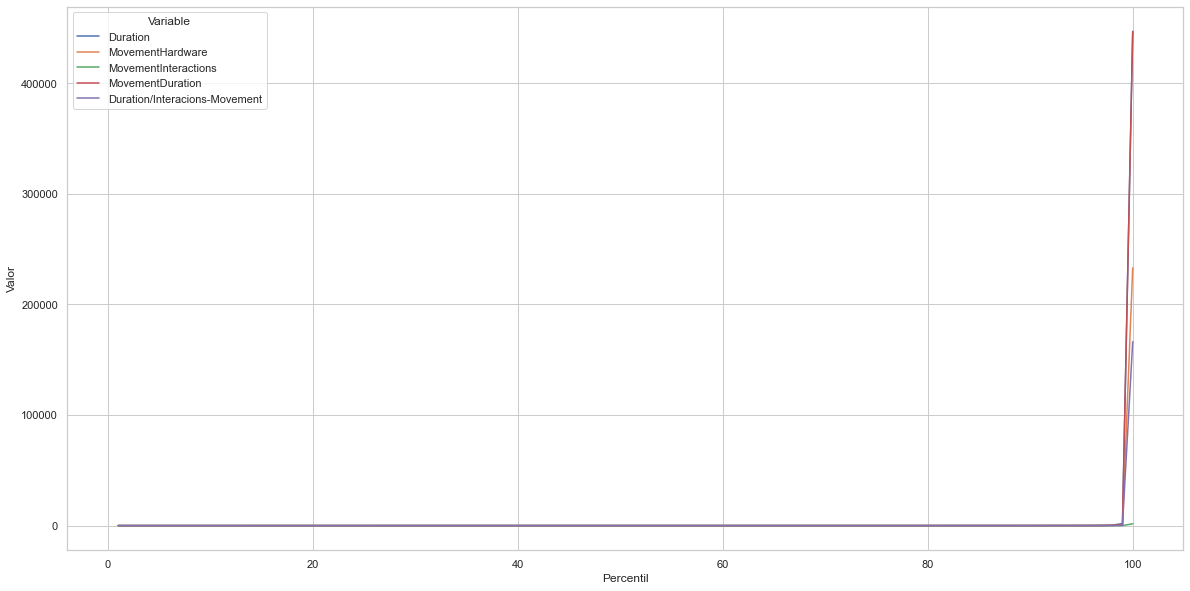

In [342]:
plt.figure(figsize=(20,10))
sns.lineplot(x="Percentil", y="Valor", hue="Variable", data=percentiles)

**Entre los percentiles 97 a 100 se observa un cambio abrupto en las medidas sensadas, ahora se van analizar más de cerca**

In [343]:
percentiles_10_100 = []

for i in range(90, 101):
    valor = [i, np.percentile(df['Duration'],i), 'Duration']
    percentiles_10_100.append(valor)

for i in range(90, 101):
    valor = [i, np.percentile(df['MovementHardware'],i), 'MovementHardware']
    percentiles_10_100.append(valor)

for i in range(90, 101):
    valor = [i, np.percentile(df['MovementInteractions'],i), 'MovementInteractions']
    percentiles_10_100.append(valor)

for i in range(90, 101):
    valor = [i, np.percentile(df['MovementDuration'],i), 'MovementDuration']
    percentiles_10_100.append(valor)

for i in range(90, 101):
    valor = [i, np.percentile(df['Duration/Interacions-Movement'],i), 'Duration/Interacions-Movement']
    percentiles_10_100.append(valor)

In [344]:
percentiles_10_100 = pd.DataFrame(percentiles_10_100, columns=['Percentil', 'Valor', 'Variable'])
percentiles_10_100

,Percentil,Valor,Variable
0,90,49.000,Duration
1,91,54.000,Duration
2,92,61.000,Duration
3,93,67.000,Duration
4,94,77.000,Duration
5,95,91.000,Duration
6,96,116.000,Duration
7,97,164.000,Duration
8,98,399.000,Duration
9,99,1752.070,Duration


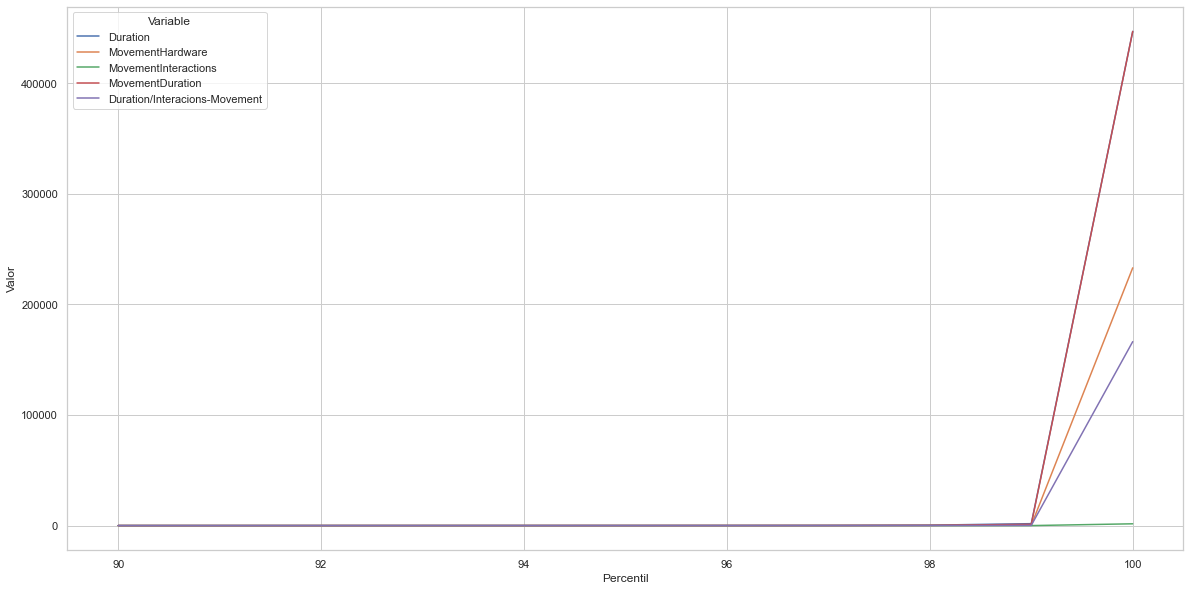

In [345]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.lineplot(x="Percentil", y="Valor", hue="Variable", data=percentiles_10_100)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))


**Se filtra la data con el valor del percentil 98 para todas las variables y se vuelve analizar**

In [346]:
df_1 = df[(df['Duration'] >= 399)]

In [347]:
df_1

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
5,556,543,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:56:04.579000+00:00,Murillo,Friday,July,13:56:04,13,56,13:56,2020-07-31,13,543.000000
400,5496,5489,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-20 17:01:38.668000+00:00,Murillo,Thursday,August,17:01:38,17,1,17:01,2020-08-20,7,5489.000000
752,2091,2079,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-09 21:25:25.035000+00:00,Murillo,Wednesday,September,21:25:25,21,25,21:25,2020-09-09,12,2079.000000
863,4472,4458,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-15 18:52:16.690900+00:00,Murillo,Tuesday,September,18:52:16,18,52,18:52,2020-09-15,14,4458.000000
1051,3350,3335,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-23 17:30:02.220000+00:00,Murillo,Wednesday,September,17:30:02,17,30,17:30,2020-09-23,15,3335.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93316,703,694,3,0,628ded2887a64a9b8f0d53865c70e090,2021-01-08 00:26:32.863000+00:00,Armenia,Friday,January,00:26:32,0,26,00:26,2021-01-08,9,231.333333
93436,1190,1178,1,0,628ded2887a64a9b8f0d53865c70e090,2021-01-22 21:48:20.042000+00:00,Armenia,Friday,January,21:48:20,21,48,21:48,2021-01-22,12,1178.000000
93791,583,571,1,0,632405e8e31846ec8169fb227f37118b,2020-11-13 22:00:49.767000+00:00,Pasto,Friday,November,22:00:49,22,0,22:00,2020-11-13,12,571.000000
95103,443,431,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-08-06 14:51:57.852000+00:00,Rio de Janeiro,Thursday,August,14:51:57,14,51,14:51,2020-08-06,12,431.000000


(array([1.783e+03, 1.150e+02, 7.000e+00, 1.200e+01, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([3.990000e+02, 4.503230e+04, 8.966560e+04, 1.342989e+05,
        1.789322e+05, 2.235655e+05, 2.681988e+05, 3.128321e+05,
        3.574654e+05, 4.020987e+05, 4.467320e+05]),
 <BarContainer object of 10 artists>)

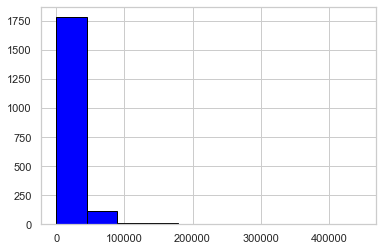

In [348]:
plt.hist(df_1['Duration'], color = 'blue', edgecolor = 'black', bins = 10)

In [349]:
df_2 = df_1[(df_1['Duration'] <= 86400)]

In [350]:
df_2

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
5,556,543,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:56:04.579000+00:00,Murillo,Friday,July,13:56:04,13,56,13:56,2020-07-31,13,543.000000
400,5496,5489,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-20 17:01:38.668000+00:00,Murillo,Thursday,August,17:01:38,17,1,17:01,2020-08-20,7,5489.000000
752,2091,2079,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-09 21:25:25.035000+00:00,Murillo,Wednesday,September,21:25:25,21,25,21:25,2020-09-09,12,2079.000000
863,4472,4458,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-15 18:52:16.690900+00:00,Murillo,Tuesday,September,18:52:16,18,52,18:52,2020-09-15,14,4458.000000
1051,3350,3335,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-23 17:30:02.220000+00:00,Murillo,Wednesday,September,17:30:02,17,30,17:30,2020-09-23,15,3335.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93316,703,694,3,0,628ded2887a64a9b8f0d53865c70e090,2021-01-08 00:26:32.863000+00:00,Armenia,Friday,January,00:26:32,0,26,00:26,2021-01-08,9,231.333333
93436,1190,1178,1,0,628ded2887a64a9b8f0d53865c70e090,2021-01-22 21:48:20.042000+00:00,Armenia,Friday,January,21:48:20,21,48,21:48,2021-01-22,12,1178.000000
93791,583,571,1,0,632405e8e31846ec8169fb227f37118b,2020-11-13 22:00:49.767000+00:00,Pasto,Friday,November,22:00:49,22,0,22:00,2020-11-13,12,571.000000
95103,443,431,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-08-06 14:51:57.852000+00:00,Rio de Janeiro,Thursday,August,14:51:57,14,51,14:51,2020-08-06,12,431.000000


(array([1659.,   91.,   24.,    6.,    3.,   15.,   57.,   25.,   10.,
           5.]),
 array([  399. ,  8848.3, 17297.6, 25746.9, 34196.2, 42645.5, 51094.8,
        59544.1, 67993.4, 76442.7, 84892. ]),
 <BarContainer object of 10 artists>)

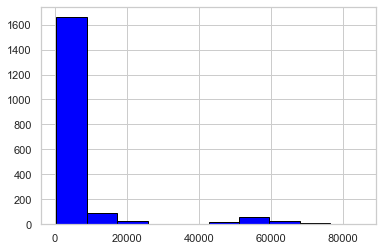

In [351]:
plt.hist(df_2['Duration'], color = 'blue', edgecolor = 'black', bins = 10)

In [352]:
df_3 = df_2[(df_2['Duration'] <= 30000)]
df_3

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
5,556,543,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:56:04.579000+00:00,Murillo,Friday,July,13:56:04,13,56,13:56,2020-07-31,13,543.000000
400,5496,5489,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-20 17:01:38.668000+00:00,Murillo,Thursday,August,17:01:38,17,1,17:01,2020-08-20,7,5489.000000
752,2091,2079,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-09 21:25:25.035000+00:00,Murillo,Wednesday,September,21:25:25,21,25,21:25,2020-09-09,12,2079.000000
863,4472,4458,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-15 18:52:16.690900+00:00,Murillo,Tuesday,September,18:52:16,18,52,18:52,2020-09-15,14,4458.000000
1051,3350,3335,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-23 17:30:02.220000+00:00,Murillo,Wednesday,September,17:30:02,17,30,17:30,2020-09-23,15,3335.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93316,703,694,3,0,628ded2887a64a9b8f0d53865c70e090,2021-01-08 00:26:32.863000+00:00,Armenia,Friday,January,00:26:32,0,26,00:26,2021-01-08,9,231.333333
93436,1190,1178,1,0,628ded2887a64a9b8f0d53865c70e090,2021-01-22 21:48:20.042000+00:00,Armenia,Friday,January,21:48:20,21,48,21:48,2021-01-22,12,1178.000000
93791,583,571,1,0,632405e8e31846ec8169fb227f37118b,2020-11-13 22:00:49.767000+00:00,Pasto,Friday,November,22:00:49,22,0,22:00,2020-11-13,12,571.000000
95103,443,431,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-08-06 14:51:57.852000+00:00,Rio de Janeiro,Thursday,August,14:51:57,14,51,14:51,2020-08-06,12,431.000000


(array([1291.,  268.,  105.,   49.,   25.,   15.,   14.,    3.,    5.,
           4.]),
 array([  399. ,  3293.1,  6187.2,  9081.3, 11975.4, 14869.5, 17763.6,
        20657.7, 23551.8, 26445.9, 29340. ]),
 <BarContainer object of 10 artists>)

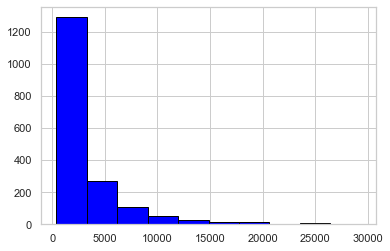

In [353]:
plt.hist(df_3['Duration'], color = 'blue', edgecolor = 'black', bins = 10)

In [354]:
df_4 = df_3[(df_3['Duration'] <= 5000)]
df_4

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
5,556,543,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:56:04.579000+00:00,Murillo,Friday,July,13:56:04,13,56,13:56,2020-07-31,13,543.000000
752,2091,2079,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-09 21:25:25.035000+00:00,Murillo,Wednesday,September,21:25:25,21,25,21:25,2020-09-09,12,2079.000000
863,4472,4458,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-15 18:52:16.690900+00:00,Murillo,Tuesday,September,18:52:16,18,52,18:52,2020-09-15,14,4458.000000
1051,3350,3335,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-23 17:30:02.220000+00:00,Murillo,Wednesday,September,17:30:02,17,30,17:30,2020-09-23,15,3335.000000
1154,1333,831,460,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-27 11:49:20.635000+00:00,Murillo,Sunday,September,11:49:20,11,49,11:49,2020-09-27,502,1.806522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93316,703,694,3,0,628ded2887a64a9b8f0d53865c70e090,2021-01-08 00:26:32.863000+00:00,Armenia,Friday,January,00:26:32,0,26,00:26,2021-01-08,9,231.333333
93436,1190,1178,1,0,628ded2887a64a9b8f0d53865c70e090,2021-01-22 21:48:20.042000+00:00,Armenia,Friday,January,21:48:20,21,48,21:48,2021-01-22,12,1178.000000
93791,583,571,1,0,632405e8e31846ec8169fb227f37118b,2020-11-13 22:00:49.767000+00:00,Pasto,Friday,November,22:00:49,22,0,22:00,2020-11-13,12,571.000000
95103,443,431,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-08-06 14:51:57.852000+00:00,Rio de Janeiro,Thursday,August,14:51:57,14,51,14:51,2020-08-06,12,431.000000


(array([370., 213., 148., 201.,  90.,  78.,  51.,  52.,  70.,  32.,  54.,
         37.,  37.,  34.,  30.]),
 array([ 399.        ,  705.26666667, 1011.53333333, 1317.8       ,
        1624.06666667, 1930.33333333, 2236.6       , 2542.86666667,
        2849.13333333, 3155.4       , 3461.66666667, 3767.93333333,
        4074.2       , 4380.46666667, 4686.73333333, 4993.        ]),
 <BarContainer object of 15 artists>)

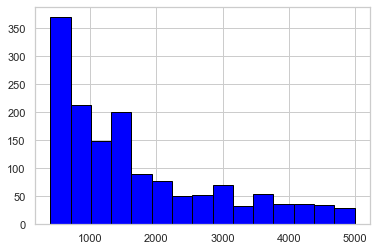

In [355]:
plt.hist(df_4['Duration'], color = 'blue', edgecolor = 'black', bins = 15)

In [470]:
df_final = df[df['Duration'] <= 5000]
df_final

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36,13,37,13:37,2020-07-31,2,20.0
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34,13,39,13:39,2020-07-31,15,0.0
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38,13,41,13:41,2020-07-31,13,9.0
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33,13,53,13:53,2020-07-31,15,0.0
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20,13,55,13:55,2020-07-31,15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 22:53:10.468000+00:00,Rio de Janeiro,Monday,September,22:53:10,22,53,22:53,2020-09-28,9,7.5
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 23:26:46.776000+00:00,Rio de Janeiro,Monday,September,23:26:46,23,26,23:26,2020-09-28,13,3.0
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:13:59.272000+00:00,Rio de Janeiro,Tuesday,September,00:13:59,0,13,00:13,2020-09-29,12,13.0
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:14:36.114000+00:00,Rio de Janeiro,Tuesday,September,00:14:36,0,14,00:14,2020-09-29,12,9.0


In [471]:
df_errores = df[df['Duration'] > 5000]
df_errores

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
400,5496,5489,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-08-20 17:01:38.668000+00:00,Murillo,Thursday,August,17:01:38,17,1,17:01,2020-08-20,7,5489.000000
1122,5081,4864,202,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-26 15:23:37.287000+00:00,Murillo,Saturday,September,15:23:37,15,23,15:23,2020-09-26,217,24.079208
1136,50848,49145,1620,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-26 20:52:25.350000+00:00,Murillo,Saturday,September,20:52:25,20,52,20:52,2020-09-26,1703,30.336420
1155,97317,96647,581,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-27 12:11:57.666000+00:00,Murillo,Sunday,September,12:11:57,12,11,12:11,2020-09-27,670,166.345955
1221,160896,160730,106,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-09-29 00:57:13.738000+00:00,Murillo,Tuesday,September,00:57:13,0,57,00:57,2020-09-29,166,1516.320755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87246,6090,6089,1,0,4f1f7ce0016c4c98b2e39bfc193b6794,2020-09-12 16:18:25.021000+00:00,Cali,Saturday,September,16:18:25,16,18,16:18,2020-09-12,1,6089.000000
91182,5021,0,0,0,5f218f65be104f2f88dbb16851ea061c,2020-08-06 18:34:20.384000+00:00,Barranquilla,Thursday,August,18:34:20,18,34,18:34,2020-08-06,5021,0.000000
91402,7577,7549,3,0,5f218f65be104f2f88dbb16851ea061c,2020-08-29 14:08:39.831000+00:00,Barranquilla,Saturday,August,14:08:39,14,8,14:08,2020-08-29,28,2516.333333
91856,7751,7738,2,0,5f218f65be104f2f88dbb16851ea061c,2020-09-29 21:25:20.609000+00:00,Barranquilla,Tuesday,September,21:25:20,21,25,21:25,2020-09-29,13,3869.000000


In [472]:
df_final.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware,Duration/Interacions-Movement
count,95605.000000,95605.000000,95605.000000,95605.0,95605.000000,95605.000000,95605.000000,95605.000000
mean,47.989687,26.491209,0.924219,0.0,17.806412,29.567272,21.498478,13.298226
std,259.368672,206.235960,4.796880,0.0,4.697147,17.309136,111.943452,132.726651
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.0,16.000000,15.000000,5.000000,0.000000
50%,15.000000,0.000000,0.000000,0.0,19.000000,30.000000,14.000000,0.000000
75%,21.000000,5.000000,1.000000,0.0,21.000000,45.000000,15.000000,4.000000
max,4993.000000,4881.000000,460.000000,0.0,23.000000,59.000000,4993.000000,4881.000000


Una posible solución para generar datos para la variable HardwareInteractions es la siguiente:

Donde la variable generada HardwareMovement tenga valores mayores a 0 AL MENOS se ha realizado una interacción con el hardware, es posible imputar un uno a todos estos registros.

In [473]:
df_final['CalculatedHardwareInteractions'] = [1 if i > 0 else 0 for i in df_final['MovementHardware']] 
df_final

<ipython-input-473-12516275ad69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['CalculatedHardwareInteractions'] = [1 if i > 0 else 0 for i in df_final['MovementHardware']]


,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement,CalculatedHardwareInteractions
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36,13,37,13:37,2020-07-31,2,20.0,1
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34,13,39,13:39,2020-07-31,15,0.0,1
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38,13,41,13:41,2020-07-31,13,9.0,1
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33,13,53,13:53,2020-07-31,15,0.0,1
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20,13,55,13:55,2020-07-31,15,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96027,24,15,2,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 22:53:10.468000+00:00,Rio de Janeiro,Monday,September,22:53:10,22,53,22:53,2020-09-28,9,7.5,1
96028,16,3,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-28 23:26:46.776000+00:00,Rio de Janeiro,Monday,September,23:26:46,23,26,23:26,2020-09-28,13,3.0,1
96029,25,13,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:13:59.272000+00:00,Rio de Janeiro,Tuesday,September,00:13:59,0,13,00:13,2020-09-29,12,13.0,1
96030,21,9,1,0,66b8bedb0e554a6bb58ed73e323e3b28,2020-09-29 00:14:36.114000+00:00,Rio de Janeiro,Tuesday,September,00:14:36,0,14,00:14,2020-09-29,12,9.0,1


In [474]:
df_final['CalculatedHardwareInteractions'].value_counts()

1    93624
0     1981
Name: CalculatedHardwareInteractions, dtype: int64

# ¿Cuáles son las 10 ciudades con más movimientos registrads por los usuarios?

In [482]:
top_ciudades_movement_interactions = df_final.groupby('Name')['MovementInteractions'].sum().sort_values(ascending= False).head(10)
top_ciudades_movement_interactions

Name
Cartagena           29155
Murillo              6960
Medellín             6341
Nuquí                6312
Bello                4242
Rio de la plata      3630
Cali                 3431
Ciudad de Panamá     3053
Montería             2921
Londres              2508
Name: MovementInteractions, dtype: int64

In [518]:
ruta_actual = os.getcwd()
top_ciudades_movement_interactions.to_csv(ruta_actual + "\data_to_load\ciudades_movement_interactions.csv" )

# ¿Cuál es el top 10 de las ollas con más interacciones de los usuarios con el extraordinario panel interactivo de un solo botón?

In [483]:
top_ollas_hardware_interactions = df_final.groupby('Key')['CalculatedHardwareInteractions'].sum().sort_values(ascending= False).head(10)
top_ollas_hardware_interactions

Key
070fce8dd1b0443cafbbad0eccba462e    6019
2f8ec18d8a764803b73ec9cf13d661a9    5769
4f1f7ce0016c4c98b2e39bfc193b6794    5484
115c61b3012b41e78814f61ad72bbb15    5336
09c4d9955cd24c0e97c19a765af8b014    5155
2c241909eb624792ad0226844a899c12    5152
02a5d1c69f5d44cfa9d2a256e62725a7    4055
1a4564e4e05d452996962259bb7cbf90    3212
2d8591c8a73840d692d1aaceb8f7e016    3072
1e9bf02e0c0c48438f1019717734232f    2909
Name: CalculatedHardwareInteractions, dtype: int64

In [520]:
ruta_actual = os.getcwd()
top_ollas_hardware_interactions.to_csv(ruta_actual + "\data_to_load\ollas_hardware_interactions.csv" )

In [477]:
len(df['Name'].unique())

29

# ¿Cuáles son los horarios entre semana y fines de semana en dónde se presentan más desplazamientos de ollas?

In [484]:
df_final['day_of_week'].value_counts()

Saturday     15078
Friday       14658
Tuesday      14236
Thursday     14191
Wednesday    14044
Monday       13541
Sunday        9857
Name: day_of_week, dtype: int64

In [485]:
day_hour_minute_movement = df_final.groupby(['day_of_week','hour_minute'])['MovementInteractions'].sum().reset_index()
day_hour_minute_movement

,day_of_week,hour_minute,MovementInteractions
0,Friday,00:00,5
1,Friday,00:01,3
2,Friday,00:02,2
3,Friday,00:03,5
4,Friday,00:04,6
...,...,...,...
5947,Wednesday,23:55,22
5948,Wednesday,23:56,5
5949,Wednesday,23:57,21
5950,Wednesday,23:58,9


In [486]:
fin_de_semana = day_hour_minute_movement[(day_hour_minute_movement['day_of_week'] == 'Saturday') | (day_hour_minute_movement['day_of_week'] == 'Sunday') ]
data_fin_de_semana = fin_de_semana.groupby('hour_minute')['MovementInteractions'].sum().reset_index()
data_fin_de_semana

,hour_minute,MovementInteractions
0,00:00,21
1,00:01,25
2,00:02,22
3,00:03,15
4,00:04,12
...,...,...
896,23:55,17
897,23:56,78
898,23:57,9
899,23:58,16


<AxesSubplot:xlabel='hour_minute', ylabel='MovementInteractions'>

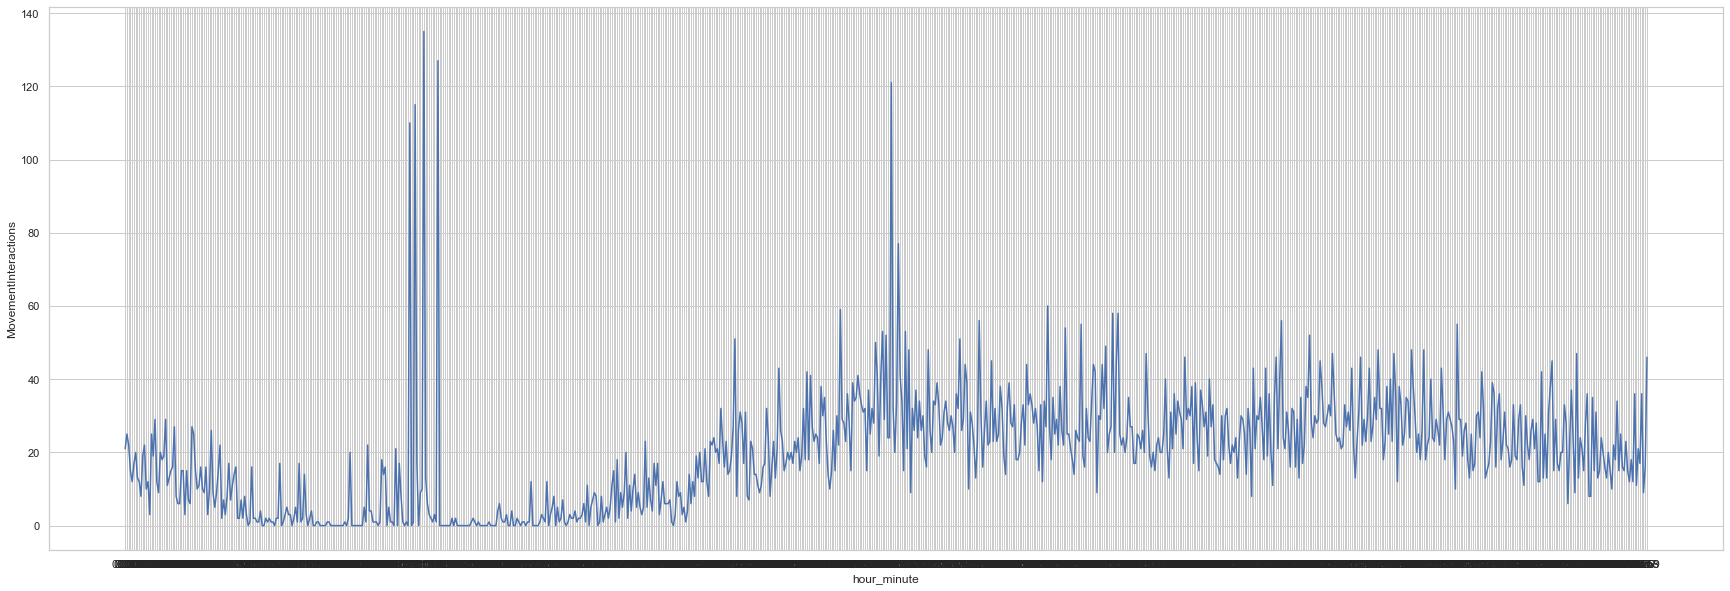

In [365]:
plt.figure(figsize=(30,10))
sns.lineplot(x="hour_minute", y="MovementInteractions", data=data_fin_de_semana)

In [487]:
day_hour_movement = df_final.groupby(['day_of_week','hour'])['MovementInteractions'].sum().reset_index()
fin_de_semana_hour = day_hour_movement[(day_hour_movement['day_of_week'] == 'Saturday') | (day_hour_movement['day_of_week'] == 'Sunday') ]
fin_de_semana_hour = fin_de_semana_hour.groupby('hour')['MovementInteractions'].sum().reset_index()
fin_de_semana_hour

,hour,MovementInteractions
0,0,945
1,1,285
2,2,173
3,3,66
4,4,318
5,5,541
6,6,152
7,7,0
8,8,382
9,9,473


In [516]:
ruta_actual = os.getcwd()
fin_de_semana_hour.to_csv(ruta_actual + "\data_to_load\weekend_hour.csv" )

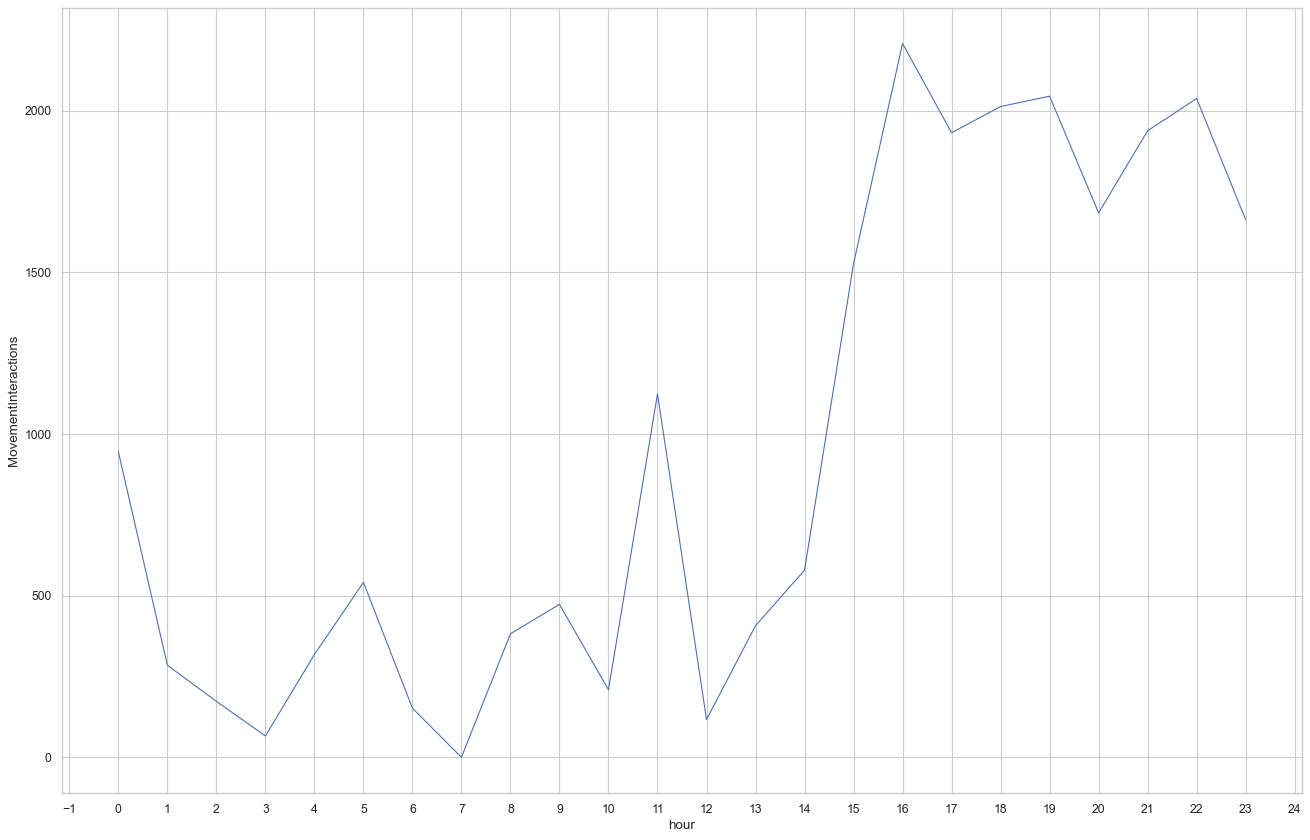

In [488]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(20,13), dpi= 80)
sns.set(style="whitegrid")
sns.lineplot(x="hour", y="MovementInteractions",  data=fin_de_semana_hour, linewidth=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [489]:
entre_semana_hour = day_hour_movement[(day_hour_movement['day_of_week'] != 'Saturday') & (day_hour_movement['day_of_week'] != 'Sunday') ]
entre_semana_hour = entre_semana_hour.groupby('hour')['MovementInteractions'].sum().reset_index()
entre_semana_hour

,hour,MovementInteractions
0,0,2011
1,1,1038
2,2,1265
3,3,585
4,4,791
5,5,925
6,6,783
7,7,758
8,8,1001
9,9,357


In [514]:
ruta_actual = os.getcwd()
entre_semana_hour.to_csv(ruta_actual + "\data_to_load\entre_semana_hour.csv" )

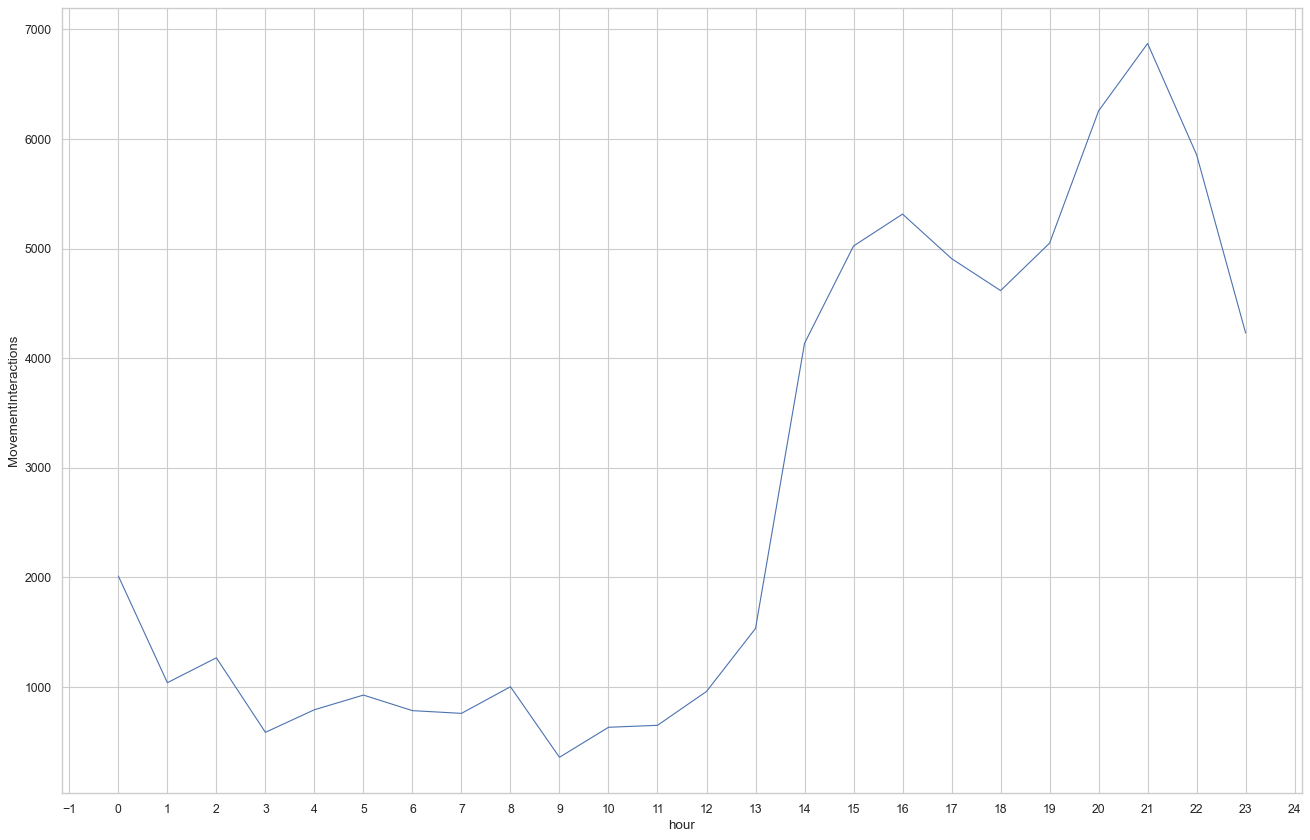

In [490]:
fig, ax = plt.subplots(figsize=(20,13), dpi= 80)
sns.set(style="whitegrid")
sns.lineplot(x="hour", y="MovementInteractions",  data=entre_semana_hour, linewidth=1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

# ¿Cuál es la ciudad que usa más las ollas?

In [523]:
use_ciudad = df_final.groupby('Name')['Duration'].count().sort_values(ascending= False).head(10)
use_ciudad


Name
Nuquí               11114
Medellín             7605
Murillo              6143
Rio de la plata      6090
Cali                 5484
Bello                5240
Montería             5199
Londres              5155
Ciudad de Panamá     4148
Cartagena            4140
Name: Duration, dtype: int64

In [526]:
ruta_actual = os.getcwd()
use_ciudad.to_csv(ruta_actual + "\data_to_load\duse_ciudad.csv" )

# ¿Cuál es la olla más utilizada?

In [524]:
use_olla = df_final.groupby('Key')['Duration'].count().sort_values(ascending= False).head(10)
use_olla

Key
070fce8dd1b0443cafbbad0eccba462e    6090
2f8ec18d8a764803b73ec9cf13d661a9    5771
4f1f7ce0016c4c98b2e39bfc193b6794    5484
115c61b3012b41e78814f61ad72bbb15    5343
2c241909eb624792ad0226844a899c12    5199
09c4d9955cd24c0e97c19a765af8b014    5155
02a5d1c69f5d44cfa9d2a256e62725a7    4055
1a4564e4e05d452996962259bb7cbf90    3221
2d8591c8a73840d692d1aaceb8f7e016    3072
1e9bf02e0c0c48438f1019717734232f    2915
Name: Duration, dtype: int64

In [527]:
ruta_actual = os.getcwd()
use_olla.to_csv(ruta_actual + "\data_to_load\duse_olla.csv" )

In [412]:
df.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware,Duration/Interacions-Movement
count,96032.000000,96032.000000,96032.000000,96032.0,96032.000000,96032.000000,96032.000000,96032.000000
mean,198.850362,142.098353,1.342990,0.0,17.784280,29.567748,56.752010,72.429828
std,3982.561445,3654.373332,12.820468,0.0,4.727531,17.312624,1539.911032,1887.206930
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.0,16.000000,15.000000,5.000000,0.000000
50%,15.000000,0.000000,0.000000,0.0,19.000000,30.000000,14.000000,0.000000
75%,21.000000,5.000000,1.000000,0.0,21.000000,45.000000,15.000000,4.000000
max,446732.000000,446716.000000,1620.000000,0.0,23.000000,59.000000,233007.000000,166292.000000


# ¿Cuál es la olla con mayores errores de medición?

In [498]:
use_olla_error = df_errores.groupby('Key')['Duration'].count().sort_values(ascending= False).head(10)
use_olla_error

Key                               Name            
1e9bf02e0c0c48438f1019717734232f  Cartagena           180
29b6ee7caa4e409eb35ab50cf763028e  Barranquilla         96
318c42f457ab4fd291123fd53c06f8fc  Medellín             28
3deadebd599248bba29641f4a89fabb4  Bosa                 26
02a5d1c69f5d44cfa9d2a256e62725a7  Murillo              18
49a2b6d7021f48d2aa6b8c56c9e2471d  Montevideo           16
13ebee2247fd427b809676163e4c6590  Springfield          10
1da79dc062a1498786b5ed172362a7fc  Ciudad de Panamá      7
11ccd89d25d14680b4d74cadf92c1c00  Pereira               5
09c4d9955cd24c0e97c19a765af8b014  Londres               4
Name: Duration, dtype: int64

In [513]:
ruta_actual = os.getcwd()
use_olla_error.to_csv(ruta_actual + "\data_to_load\olla_error.csv" )

# ¿Qué ciudad tiene los mayores errores de medición?

In [497]:
use_ciudad_error = df_errores.groupby('Name')['Duration'].count().sort_values(ascending= False).head(10)
use_ciudad_error

Name
Cartagena           182
Barranquilla         99
Medellín             32
Bosa                 26
Murillo              18
Montevideo           16
Springfield          10
Ciudad de Panamá      7
Pereira               5
Nuquí                 4
Name: Duration, dtype: int64

In [512]:
ruta_actual = os.getcwd()
use_ciudad_error.to_csv(ruta_actual + "\data_to_load\ciudad_error.csv" )

# Inspeccionando las ollas

In [433]:
olla_1 = df[df['Key'] == '1e9bf02e0c0c48438f1019717734232f']
olla_1

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
41602,15,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 17:04:47.554000+00:00,Cartagena,Thursday,January,17:04:47,17,4,17:04,2020-01-02,15,0.000000
41603,6,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 17:17:59.785000+00:00,Cartagena,Thursday,January,17:17:59,17,17,17:17,2020-01-02,6,0.000000
41604,8,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 18:07:33.429000+00:00,Cartagena,Thursday,January,18:07:33,18,7,18:07,2020-01-02,8,0.000000
41605,21,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 18:08:39.987000+00:00,Cartagena,Thursday,January,18:08:39,18,8,18:08,2020-01-02,21,0.000000
41606,15,0,0,0,1e9bf02e0c0c48438f1019717734232f,2020-01-02 18:33:54.151000+00:00,Cartagena,Thursday,January,18:33:54,18,33,18:33,2020-01-02,15,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44692,2036,1558,43,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:01:42.496000+00:00,Cartagena,Friday,December,14:01:42,14,1,14:01,2020-12-11,478,36.232558
44693,5,4,2,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:36:09.448000+00:00,Cartagena,Friday,December,14:36:09,14,36,14:36,2020-12-11,1,2.000000
44694,176,120,6,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:36:45.281900+00:00,Cartagena,Friday,December,14:36:45,14,36,14:36,2020-12-11,56,20.000000
44695,225,113,7,0,1e9bf02e0c0c48438f1019717734232f,2020-12-11 14:40:05.233000+00:00,Cartagena,Friday,December,14:40:05,14,40,14:40,2020-12-11,112,16.142857


In [434]:
olla_1.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware,Duration/Interacions-Movement
count,3095.000000,3095.000000,3095.000000,3095.0,3095.000000,3095.000000,3095.000000,3095.000000
mean,1050.292407,809.338611,21.213570,0.0,15.523748,29.756381,240.953796,91.975827
std,2992.467163,2440.445963,59.343608,0.0,7.201415,17.257680,671.678602,1252.738474
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.0,14.000000,15.000000,9.000000,0.000000
50%,19.000000,5.000000,1.000000,0.0,18.000000,30.000000,15.000000,4.000000
75%,562.000000,431.500000,7.000000,0.0,21.000000,44.000000,81.000000,30.945819
max,49686.000000,49674.000000,821.000000,0.0,23.000000,59.000000,9388.000000,49674.000000


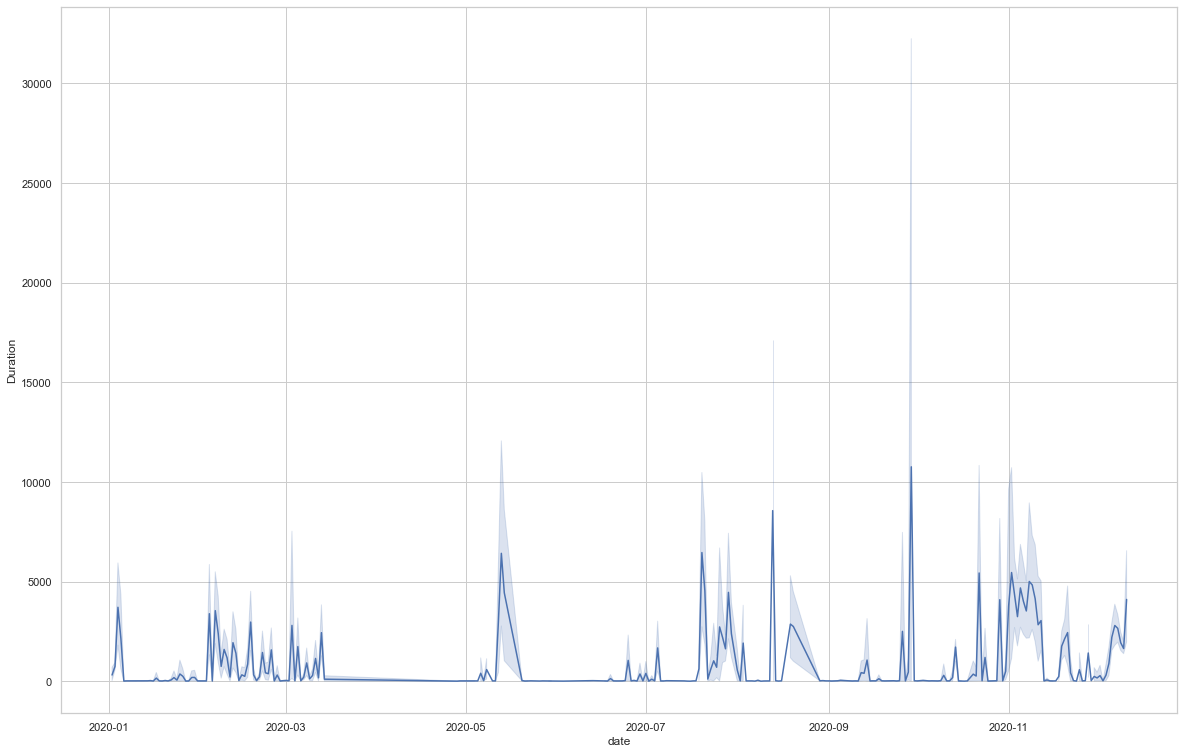

In [435]:
plt.subplots(figsize=(20,13))
sns.lineplot(x="date", y="Duration",  data=olla_1)
plt.show()

In [423]:
olla_2 = df[df['Key'] == '29b6ee7caa4e409eb35ab50cf763028e']
olla_2

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
48270,43,30,1,0,29b6ee7caa4e409eb35ab50cf763028e,2019-10-27 19:54:00.239000+00:00,Barranquilla,Sunday,October,19:54:00,19,54,19:54,2019-10-27,13,30.0
48271,38,26,1,0,29b6ee7caa4e409eb35ab50cf763028e,2019-10-27 19:59:17.884000+00:00,Barranquilla,Sunday,October,19:59:17,19,59,19:59,2019-10-27,12,26.0
48272,30,18,1,0,29b6ee7caa4e409eb35ab50cf763028e,2019-10-27 20:00:16.647000+00:00,Barranquilla,Sunday,October,20:00:16,20,0,20:00,2019-10-27,12,18.0
48273,925,0,1,0,29b6ee7caa4e409eb35ab50cf763028e,2019-10-27 20:07:09.585000+00:00,Barranquilla,Sunday,October,20:07:09,20,7,20:07,2019-10-27,925,0.0
48274,70987,0,1,0,29b6ee7caa4e409eb35ab50cf763028e,2019-10-28 20:44:15.753000+00:00,Barranquilla,Monday,October,20:44:15,20,44,20:44,2019-10-28,70987,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48649,322,0,1,0,29b6ee7caa4e409eb35ab50cf763028e,2020-03-01 21:21:22.899000+00:00,Barranquilla,Sunday,March,21:21:22,21,21,21:21,2020-03-01,322,0.0
48650,0,0,0,0,29b6ee7caa4e409eb35ab50cf763028e,2020-03-01 21:27:44.072000+00:00,Barranquilla,Sunday,March,21:27:44,21,27,21:27,2020-03-01,0,0.0
48651,1,0,0,0,29b6ee7caa4e409eb35ab50cf763028e,2020-03-01 21:43:33.598000+00:00,Barranquilla,Sunday,March,21:43:33,21,43,21:43,2020-03-01,1,0.0
48652,7185,0,1,0,29b6ee7caa4e409eb35ab50cf763028e,2020-03-01 21:59:20.396000+00:00,Barranquilla,Sunday,March,21:59:20,21,59,21:59,2020-03-01,7185,0.0


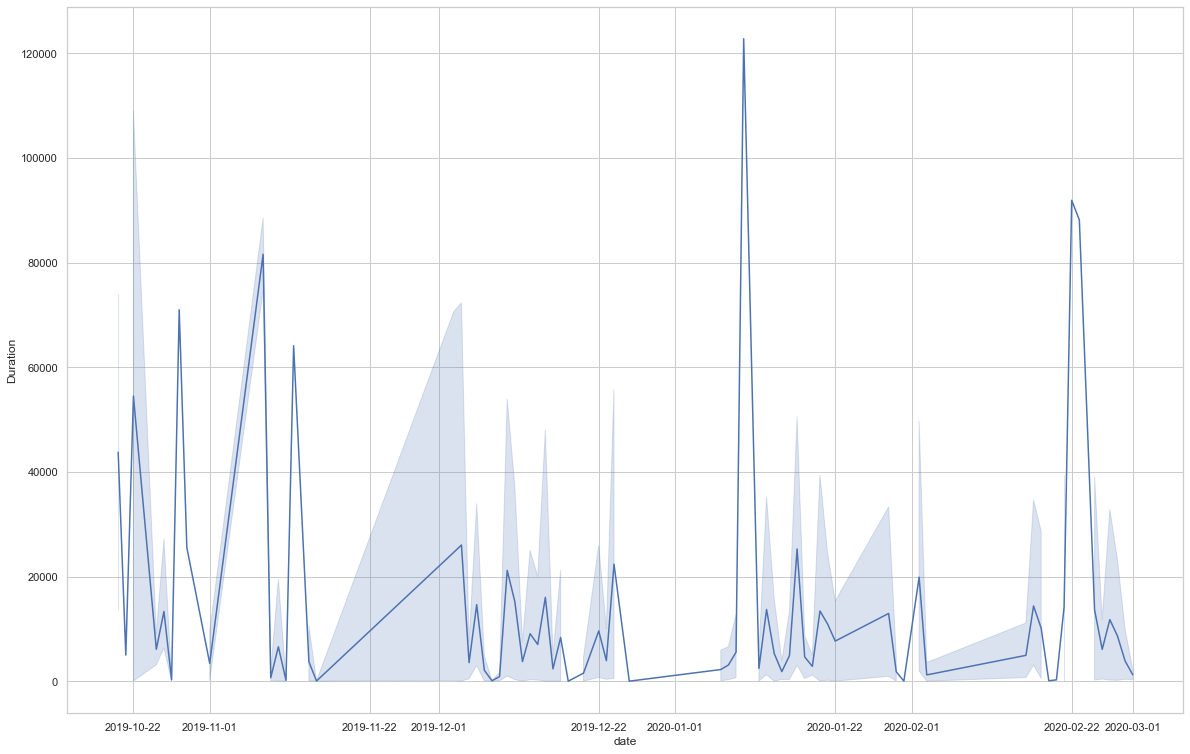

In [424]:
plt.subplots(figsize=(20,13))
sns.lineplot(x="date", y="Duration",  data=olla_2)
plt.show()

In [425]:
olla_2.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware,Duration/Interacions-Movement
count,384.000000,384.000000,384.000000,384.0,384.000000,384.000000,384.000000,384.000000
mean,9223.809896,2677.893229,1.013021,0.0,17.132812,31.757812,6545.916667,1415.788927
std,22355.579881,12679.527902,2.877360,0.0,6.936908,17.523016,19019.319928,7385.054474
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,10.750000,0.000000,0.000000,0.0,16.000000,18.000000,7.000000,0.000000
50%,120.500000,0.000000,0.000000,0.0,19.500000,32.500000,18.500000,0.000000
75%,4998.500000,0.000000,1.000000,0.0,22.000000,47.000000,1985.250000,0.000000
max,165409.000000,122709.000000,39.000000,0.0,23.000000,59.000000,165409.000000,81956.000000


In [426]:
olla_3 = df[df['Key'] == '318c42f457ab4fd291123fd53c06f8fc']
olla_3

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
68148,10,0,0,0,318c42f457ab4fd291123fd53c06f8fc,2019-11-06 18:13:10.634000+00:00,Medellín,Wednesday,November,18:13:10,18,13,18:13,2019-11-06,10,0.0
68149,116,0,0,0,318c42f457ab4fd291123fd53c06f8fc,2019-11-06 18:14:14.542000+00:00,Medellín,Wednesday,November,18:14:14,18,14,18:14,2019-11-06,116,0.0
68150,65,0,0,0,318c42f457ab4fd291123fd53c06f8fc,2019-11-06 18:33:29.939000+00:00,Medellín,Wednesday,November,18:33:29,18,33,18:33,2019-11-06,65,0.0
68151,16,0,0,0,318c42f457ab4fd291123fd53c06f8fc,2019-11-06 18:35:01.623000+00:00,Medellín,Wednesday,November,18:35:01,18,35,18:35,2019-11-06,16,0.0
68152,15,0,0,0,318c42f457ab4fd291123fd53c06f8fc,2019-11-06 18:35:47.383000+00:00,Medellín,Wednesday,November,18:35:47,18,35,18:35,2019-11-06,15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70480,29340,29329,1,0,318c42f457ab4fd291123fd53c06f8fc,2020-02-25 14:57:49.424000+00:00,Medellín,Tuesday,February,14:57:49,14,57,14:57,2020-02-25,11,29329.0
70481,140674,140673,2,0,318c42f457ab4fd291123fd53c06f8fc,2020-02-25 23:09:54.253000+00:00,Medellín,Tuesday,February,23:09:54,23,9,23:09,2020-02-25,1,70336.5
70482,96363,96341,5,0,318c42f457ab4fd291123fd53c06f8fc,2020-02-27 14:14:59.101000+00:00,Medellín,Thursday,February,14:14:59,14,14,14:14,2020-02-27,22,19268.2
70483,18649,18635,2,0,318c42f457ab4fd291123fd53c06f8fc,2020-02-28 17:01:27.383000+00:00,Medellín,Friday,February,17:01:27,17,1,17:01,2020-02-28,14,9317.5


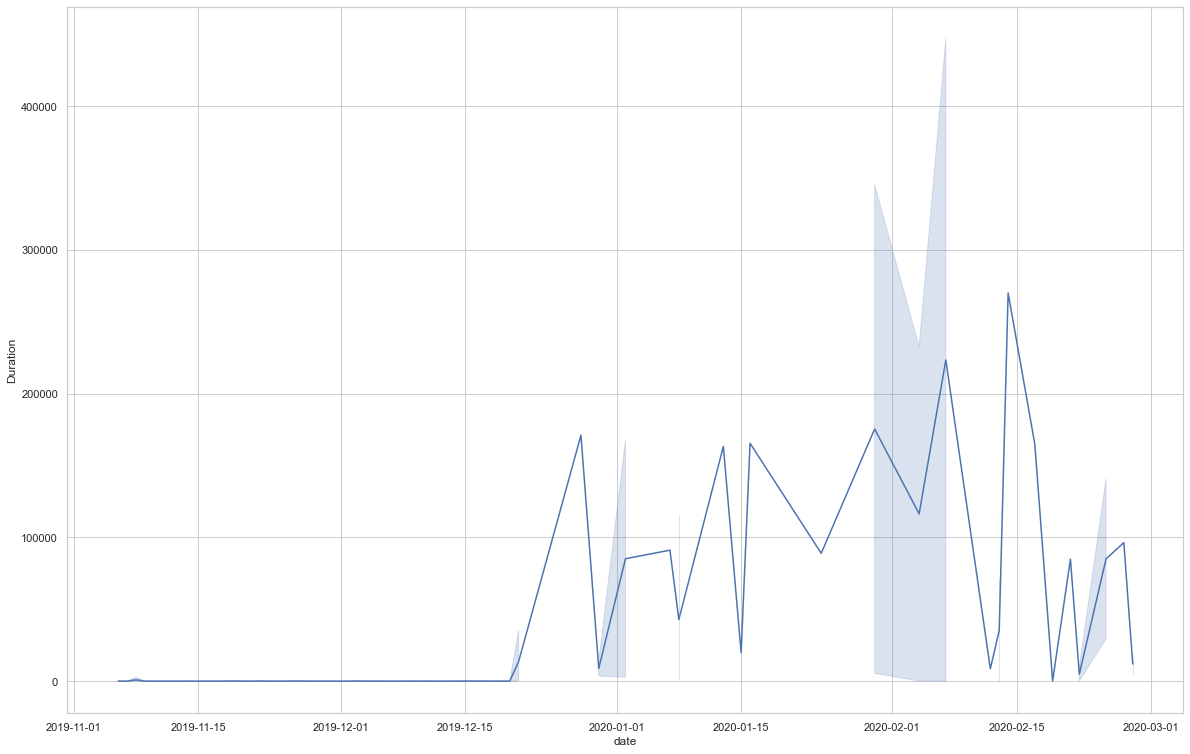

In [427]:
plt.subplots(figsize=(20,13))
sns.lineplot(x="date", y="Duration",  data=olla_3)
plt.show()

In [428]:
olla_3.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware,Duration/Interacions-Movement
count,2337.000000,2337.000000,2337.000000,2337.0,2337.000000,2337.000000,2337.000000,2337.000000
mean,1394.258879,1379.008558,0.703466,0.0,18.094138,29.494223,15.250321,561.097856
std,16957.795775,16957.503567,1.256746,0.0,2.779056,17.680335,19.522890,6386.408090
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
25%,10.000000,0.000000,0.000000,0.0,16.000000,14.000000,5.000000,0.000000
50%,15.000000,0.000000,0.000000,0.0,18.000000,30.000000,14.000000,0.000000
75%,36.000000,13.000000,1.000000,0.0,20.000000,45.000000,15.000000,10.000000
max,446732.000000,446716.000000,13.000000,0.0,23.000000,59.000000,340.000000,163247.000000


In [430]:
olla_3[olla_3['Duration'] > 86000]

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
70446,171019,171014,2,0,318c42f457ab4fd291123fd53c06f8fc,2019-12-28 17:53:20.704000+00:00,Medellín,Saturday,December,17:53:20,17,53,17:53,2019-12-28,5,85507.000000
70450,167422,167370,3,0,318c42f457ab4fd291123fd53c06f8fc,2020-01-02 19:45:08.691900+00:00,Medellín,Thursday,January,19:45:08,19,45,19:45,2020-01-02,52,55790.000000
70451,91118,91094,9,0,318c42f457ab4fd291123fd53c06f8fc,2020-01-07 16:20:57.373000+00:00,Medellín,Tuesday,January,16:20:57,16,20,16:20,2020-01-07,24,10121.555556
70455,153142,153128,5,0,318c42f457ab4fd291123fd53c06f8fc,2020-01-08 22:52:32.322000+00:00,Medellín,Wednesday,January,22:52:32,22,52,22:52,2020-01-08,14,30625.600000
70456,163257,163247,1,0,318c42f457ab4fd291123fd53c06f8fc,2020-01-13 19:50:35.692900+00:00,Medellín,Monday,January,19:50:35,19,50,19:50,2020-01-13,10,163247.000000
70458,165452,165434,7,0,318c42f457ab4fd291123fd53c06f8fc,2020-01-16 18:18:41.036000+00:00,Medellín,Thursday,January,18:18:41,18,18,18:18,2020-01-16,18,23633.428571
70459,88930,88924,1,0,318c42f457ab4fd291123fd53c06f8fc,2020-01-24 16:38:57.616000+00:00,Medellín,Friday,January,16:38:57,16,38,16:38,2020-01-24,6,88924.000000
70461,345299,345262,4,0,318c42f457ab4fd291123fd53c06f8fc,2020-01-30 15:52:43.845000+00:00,Medellín,Thursday,January,15:52:43,15,52,15:52,2020-01-30,37,86315.500000
70463,232675,232672,6,0,318c42f457ab4fd291123fd53c06f8fc,2020-02-04 21:55:53.786000+00:00,Medellín,Tuesday,February,21:55:53,21,55,21:55,2020-02-04,3,38778.666667
70465,446732,446716,8,0,318c42f457ab4fd291123fd53c06f8fc,2020-02-07 15:05:29.991000+00:00,Medellín,Friday,February,15:05:29,15,5,15:05,2020-02-07,16,55839.500000


In [437]:
olla_4 = df[df['Key'] == '02a5d1c69f5d44cfa9d2a256e62725a7']
olla_4

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
0,22,20,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:37:36.449000+00:00,Murillo,Friday,July,13:37:36,13,37,13:37,2020-07-31,2,20.0
1,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:39:34.086900+00:00,Murillo,Friday,July,13:39:34,13,39,13:39,2020-07-31,15,0.0
2,22,9,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:41:38.173900+00:00,Murillo,Friday,July,13:41:38,13,41,13:41,2020-07-31,13,9.0
3,15,0,1,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:53:33.820000+00:00,Murillo,Friday,July,13:53:33,13,53,13:53,2020-07-31,15,0.0
4,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2020-07-31 13:55:20.597000+00:00,Murillo,Friday,July,13:55:20,13,55,13:55,2020-07-31,15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,59,15,3,0,02a5d1c69f5d44cfa9d2a256e62725a7,2021-01-26 20:30:28.337000+00:00,Murillo,Tuesday,January,20:30:28,20,30,20:30,2021-01-26,44,5.0
4069,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2021-01-26 20:31:48.973000+00:00,Murillo,Tuesday,January,20:31:48,20,31,20:31,2021-01-26,15,0.0
4070,9,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2021-01-26 20:36:54.820000+00:00,Murillo,Tuesday,January,20:36:54,20,36,20:36,2021-01-26,9,0.0
4071,15,0,0,0,02a5d1c69f5d44cfa9d2a256e62725a7,2021-01-26 20:37:26.268000+00:00,Murillo,Tuesday,January,20:37:26,20,37,20:37,2021-01-26,15,0.0


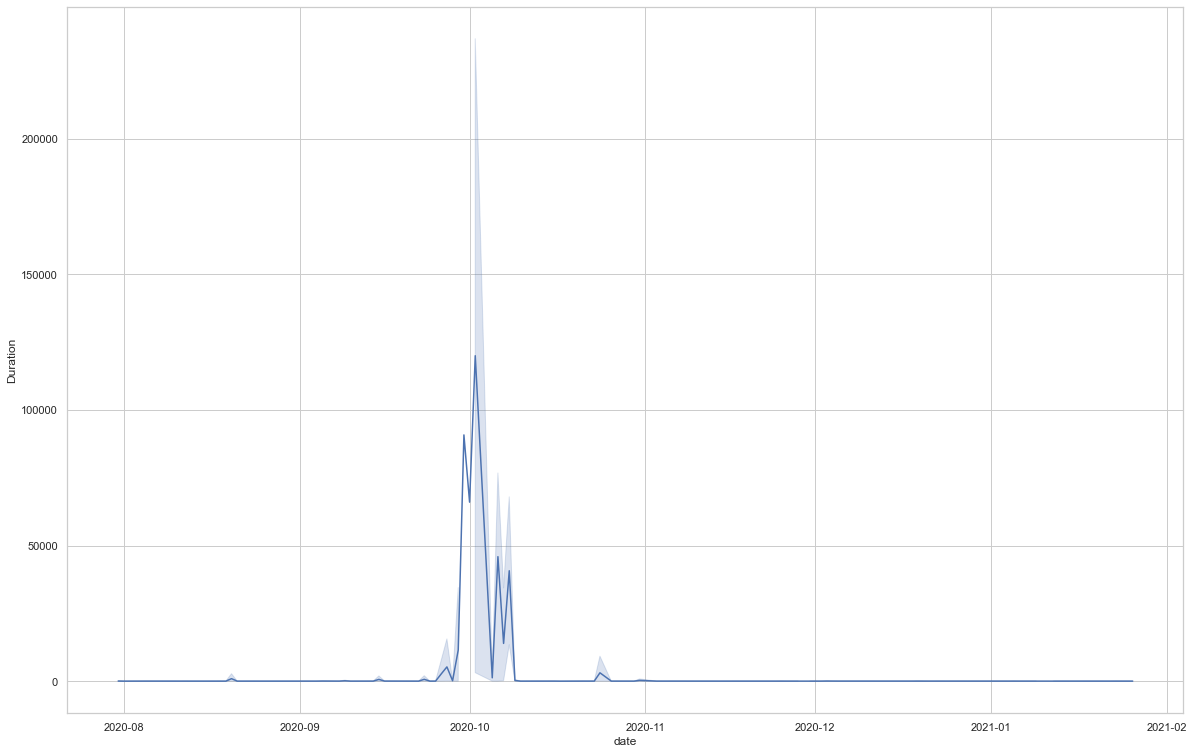

In [438]:
plt.subplots(figsize=(20,13))
sns.lineplot(x="date", y="Duration",  data=olla_4)
plt.show()

In [439]:
olla_4.describe()

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,hour,minute,MovementHardware,Duration/Interacions-Movement
count,4073.000000,4073.000000,4073.000000,4073.0,4073.000000,4073.000000,4073.000000,4073.000000
mean,325.255340,309.575006,2.322367,0.0,17.368524,29.297569,15.680334,45.987089
std,6060.974993,6053.333355,29.117200,0.0,2.944637,17.058573,35.100466,994.613838
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
25%,11.000000,0.000000,0.000000,0.0,15.000000,15.000000,6.000000,0.000000
50%,15.000000,0.000000,0.000000,0.0,17.000000,30.000000,14.000000,0.000000
75%,25.000000,9.000000,1.000000,0.0,20.000000,44.000000,15.000000,6.000000
max,236820.000000,236769.000000,1620.000000,0.0,23.000000,59.000000,1703.000000,39060.750000


In [440]:
olla_5 = df[df['Key'] == '3deadebd599248bba29641f4a89fabb4']
olla_5

,Duration,MovementDuration,MovementInteractions,HardwareInteractions,Key,Date,Name,day_of_week,month,time,hour,minute,hour_minute,date,MovementHardware,Duration/Interacions-Movement
77374,6,0,0,0,3deadebd599248bba29641f4a89fabb4,2020-05-26 14:45:23.369000+00:00,Bosa,Tuesday,May,14:45:23,14,45,14:45,2020-05-26,6,0.0
77375,15,0,0,0,3deadebd599248bba29641f4a89fabb4,2020-05-26 18:02:33.747000+00:00,Bosa,Tuesday,May,18:02:33,18,2,18:02,2020-05-26,15,0.0
77376,15,0,0,0,3deadebd599248bba29641f4a89fabb4,2020-05-26 20:27:27.945000+00:00,Bosa,Tuesday,May,20:27:27,20,27,20:27,2020-05-26,15,0.0
77377,15,0,0,0,3deadebd599248bba29641f4a89fabb4,2020-05-27 19:10:43.142900+00:00,Bosa,Wednesday,May,19:10:43,19,10,19:10,2020-05-27,15,0.0
77378,3,0,0,0,3deadebd599248bba29641f4a89fabb4,2020-05-27 19:11:10.976000+00:00,Bosa,Wednesday,May,19:11:10,19,11,19:11,2020-05-27,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79502,5,1,1,0,3deadebd599248bba29641f4a89fabb4,2021-01-26 20:03:43.392000+00:00,Bosa,Tuesday,January,20:03:43,20,3,20:03,2021-01-26,4,1.0
79503,15,0,1,0,3deadebd599248bba29641f4a89fabb4,2021-01-26 20:59:04.933000+00:00,Bosa,Tuesday,January,20:59:04,20,59,20:59,2021-01-26,15,0.0
79504,1,0,0,0,3deadebd599248bba29641f4a89fabb4,2021-01-26 22:26:01.864000+00:00,Bosa,Tuesday,January,22:26:01,22,26,22:26,2021-01-26,1,0.0
79505,16,2,1,0,3deadebd599248bba29641f4a89fabb4,2021-01-26 22:46:52.344900+00:00,Bosa,Tuesday,January,22:46:52,22,46,22:46,2021-01-26,14,2.0


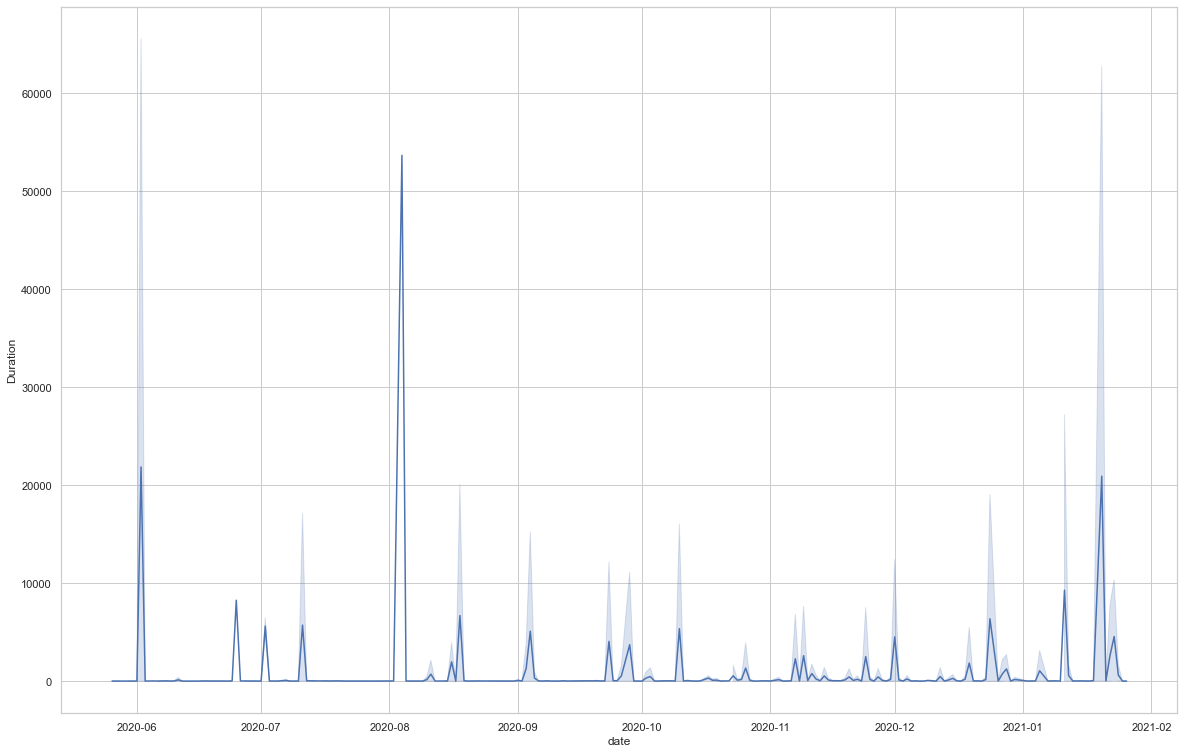

In [441]:
plt.subplots(figsize=(20,13))
sns.lineplot(x="date", y="Duration",  data=olla_5)
plt.show()

In [ ]:
olla_5.describe()

In [431]:
use_olla_error_1 = df.groupby('Key')['Duration'].sum().sort_values(ascending= False)
use_olla_error_1

Key
29b6ee7caa4e409eb35ab50cf763028e    3541943
318c42f457ab4fd291123fd53c06f8fc    3258383
1e9bf02e0c0c48438f1019717734232f    3250655
02a5d1c69f5d44cfa9d2a256e62725a7    1324765
3deadebd599248bba29641f4a89fabb4    1213257
49a2b6d7021f48d2aa6b8c56c9e2471d     927164
1da79dc062a1498786b5ed172362a7fc     527948
13ebee2247fd427b809676163e4c6590     521255
096c10aac4214c11a67e10473671a3ca     466964
11ccd89d25d14680b4d74cadf92c1c00     443934
09c4d9955cd24c0e97c19a765af8b014     383287
070fce8dd1b0443cafbbad0eccba462e     272958
2d8591c8a73840d692d1aaceb8f7e016     261883
2f8ec18d8a764803b73ec9cf13d661a9     249929
053b8b9d38d14f0097a16ff3f2df98fa     231694
115c61b3012b41e78814f61ad72bbb15     229016
2c241909eb624792ad0226844a899c12     207241
5f218f65be104f2f88dbb16851ea061c     200891
3196ec1df9384ad08a00abcd1bc01a97     168558
2fcb06120c8a47c49a45d7295aab342d     146544
246983454b2d4f3081e713e524b272db     139376
4f1f7ce0016c4c98b2e39bfc193b6794     131795
2771d4adc72b40348aa70131a605

In [449]:
print(min(df['Date']))
print(max(df['Date']))

2019-10-20 15:56:50.036000+00:00
2021-01-26 23:56:52.392000+00:00


NameError: name 'ruta_actual' is not defined